In [1]:
# Goal : Prepare an ML model which can predict the profit value of a company if the value of its R&D Spend, Administration Cost and Marketing
# Spend are given.

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Importing data

In [3]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [5]:
df.shape

(50, 4)

In [6]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Data Cleaning

In [8]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [9]:
df.duplicated().sum()

0

# Plotting Correlation Matrix

In [10]:
co_mat = df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr()
co_mat

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


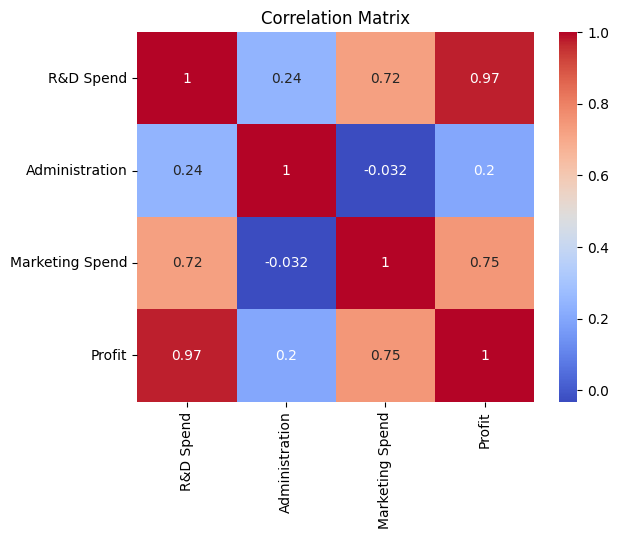

In [11]:
sb.heatmap(co_mat, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

# plots

### Scatter Plots

C:\Users\SUVRO\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


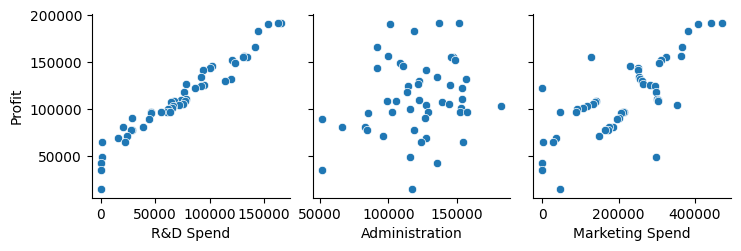

In [12]:
sb.pairplot(df, x_vars = ['R&D Spend', 'Administration', 'Marketing Spend'], y_vars = 'Profit', kind = 'scatter')
plt.show()

### Regression Plots

C:\Users\SUVRO\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\SUVRO\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\SUVRO\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


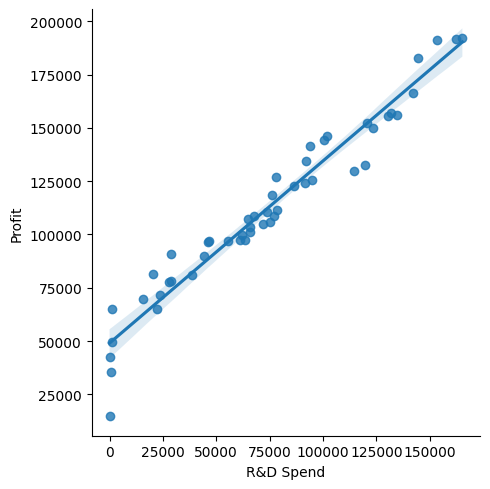

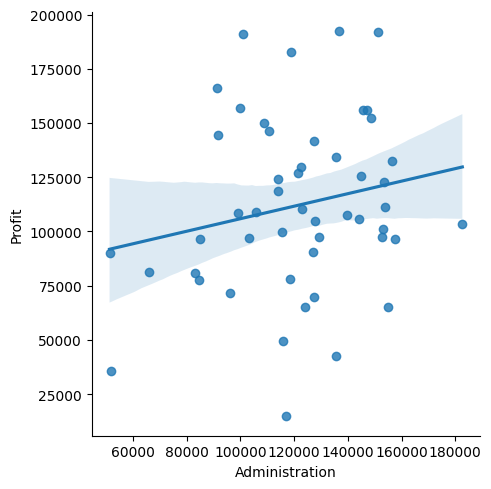

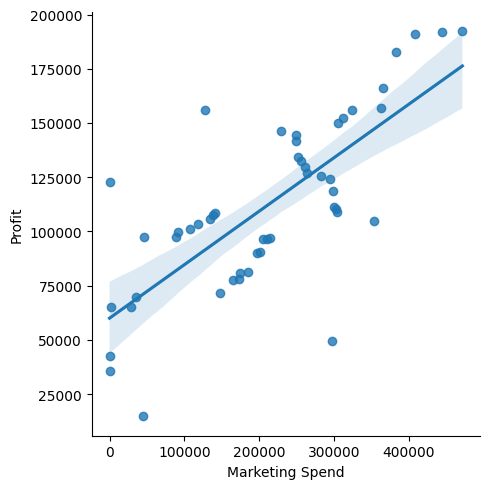

In [13]:
sb.lmplot(x = 'R&D Spend', y = 'Profit', data=df)
sb.lmplot(x = 'Administration', y = 'Profit', data=df)
sb.lmplot(x = 'Marketing Spend', y = 'Profit', data=df)
plt.show()

### Distribution Plot

C:\Users\SUVRO\AppData\Local\Temp\ipykernel_18192\2491555772.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Profit'], color = 'red')


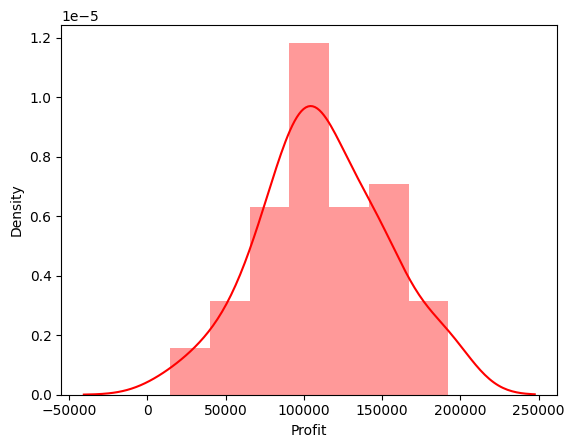

In [14]:
sb.distplot(df['Profit'], color = 'red')
plt.show()

### Histogram Plot

C:\Users\SUVRO\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


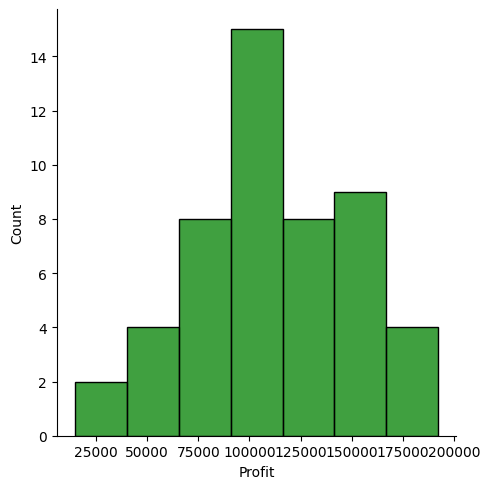

In [15]:
sb.displot(df['Profit'], color = 'green')
plt.show()

# Models Train Test & BestFit

In [16]:
X =df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
len(X_train)

40

In [18]:
len(X_test)

10

## Linear Regression

In [19]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [20]:
lin_pred = lin.predict(X_test)

#### Linear R2

In [21]:
lin_r2 = r2_score(y_test, lin_pred)
lin_r2

0.900065308303732

#### Linear MSE

In [22]:
lin_mse = mean_squared_error(y_test, lin_pred)
lin_mse

80926321.2229516

#### Linear MAE

In [23]:
lin_mae = mean_absolute_error(y_test, lin_pred)
lin_mae

6979.1522523704

## Decision Tree

In [24]:
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [25]:
d_tree_pred = d_tree.predict(X_test)

#### Decision R2

In [26]:
d_tree_r2 = r2_score(y_test, d_tree_pred)
d_tree_r2

0.8549635862369611

#### Decision MSE

In [27]:
d_tree_mse = mean_squared_error(y_test, d_tree_pred)
d_tree_mse

117449338.2626899

#### Decision MAE

In [28]:
d_tree_mae = mean_absolute_error(y_test, d_tree_pred)
d_tree_mae

8138.886999999997

## Random Forest Regressor(RFR)

In [29]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
rfr_pred = rfr.predict(X_test)

#### RFR R2

In [31]:
rfr_r2 = r2_score(y_test, rfr_pred)
rfr_r2

0.9060579123317773

#### RFR MSE

In [32]:
rfr_mse = mean_squared_error(y_test, rfr_pred)
rfr_mse

76073557.98023817

#### RFR MAE

In [33]:
rfr_mae = mean_absolute_error(y_test, rfr_pred)
rfr_mae

6339.081839999983

## Ridge Regression

In [34]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [35]:
ridge_pred = ridge.predict(X_test)

#### Ridge R2

In [36]:
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_r2

0.9000653083036411

#### Ridge MSE

In [37]:
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mse

80926321.22302528

#### Ridge MAE

In [38]:
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mae

6979.152252376222

## Lasso Regression

In [39]:
las = Lasso(alpha = 0.1)
las.fit(X_train, y_train)

Lasso(alpha=0.1)

In [40]:
las_pred = las.predict(X_test)

#### Lasso R2

In [41]:
las_r2 = r2_score(y_test, las_pred)
las_r2

0.9000653083601803

#### Lasso MSE

In [42]:
las_mse = mean_squared_error(y_test, las_pred)
las_mse

80926321.1772403

#### Lasso MAE

In [43]:
las_mae = mean_absolute_error(y_test, las_pred)
las_mae

6979.152250714319

## Elasticnet Regression

In [44]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [45]:
enet_pred = enet.predict(X_test)

#### Elasticnet R2

In [46]:
enet_r2 = r2_score(y_test, enet_pred)
enet_r2

0.9000653083311747

#### Elasticnet MSE

In [47]:
enet_mse = mean_squared_error(y_test, enet_pred)
enet_mse

80926321.2007288

#### Elasticnet MAE

In [48]:
enet_mae = mean_absolute_error(y_test, enet_pred)
enet_mae

6979.15225159858

## Support Vector Regression (SVR)

In [49]:
svr= SVR(kernel = 'linear')
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [50]:
svr_pred = svr.predict(X_test)

#### SVR R2

In [51]:
svr_r2 = r2_score(y_test, svr_pred)
svr_r2

0.8717792697906213

#### SVR MSE

In [52]:
svr_mse = mean_squared_error(y_test, svr_pred)
svr_mse

103832131.00714561

#### SVR MAE

In [53]:
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_mae

7702.623215893979

## XGBoost

In [54]:
xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [55]:
xg_pred = xg.predict(X_test)

#### XGB R2

In [56]:
xg_r2 = r2_score(y_test, xg_pred)
xg_r2

0.904580278463066

#### XGB MSE

In [57]:
xg_mse = mean_squared_error(y_test, xg_pred)
xg_mse

77270134.17494626

#### XGB MAE

In [58]:
xg_mae = mean_absolute_error(y_test, xg_pred)
xg_mae

7779.489250000001

# Best Model Selection

In [59]:
result = pd.DataFrame({
    'Model' : ['Linear', 'Decision Tree', 'Random Forest', 'Ridge', 'Lasso', 'Elasticnet', 'SVR', 'XGB'],
    'R2_score' : [lin_r2, d_tree_r2, rfr_r2, ridge_r2, las_r2, enet_r2, svr_r2, xg_r2],
    'MSE' : [lin_mse, d_tree_mse, rfr_mse, ridge_mse, las_mse, enet_mse, svr_mse, xg_mse],
    'MAE' : [lin_mae, d_tree_mae, rfr_mae, ridge_mae, las_mae, enet_mae, svr_mae, xg_mae]
})

In [60]:
result

,Model,R2_score,MSE,MAE
0,Linear,0.900065,8.092632e+07,6979.152252
1,Decision Tree,0.854964,1.174493e+08,8138.887000
2,Random Forest,0.906058,7.607356e+07,6339.081840
3,Ridge,0.900065,8.092632e+07,6979.152252
4,Lasso,0.900065,8.092632e+07,6979.152251
5,Elasticnet,0.900065,8.092632e+07,6979.152252
6,SVR,0.871779,1.038321e+08,7702.623216
7,XGB,0.904580,7.727013e+07,7779.489250


In [61]:
result['R2_rank'] = result['R2_score'].rank(ascending = False, method = 'min')
result['MSE_rank'] = result['MSE'].rank(ascending = True, method = 'min')
result['MAE_rank'] = result['MAE'].rank(ascending = True, method = 'min')

In [62]:
result['Final_rank'] = result['R2_rank'] + result['MSE_rank'] + result['MAE_rank']

In [63]:
Final_result = result.sort_values('Final_rank')

In [64]:
Final_result

,Model,R2_score,MSE,MAE,R2_rank,MSE_rank,MAE_rank,Final_rank
2,Random Forest,0.906058,7.607356e+07,6339.081840,1.0,1.0,1.0,3.0
4,Lasso,0.900065,8.092632e+07,6979.152251,3.0,3.0,2.0,8.0
5,Elasticnet,0.900065,8.092632e+07,6979.152252,4.0,4.0,3.0,11.0
7,XGB,0.904580,7.727013e+07,7779.489250,2.0,2.0,7.0,11.0
0,Linear,0.900065,8.092632e+07,6979.152252,5.0,5.0,4.0,14.0
3,Ridge,0.900065,8.092632e+07,6979.152252,6.0,6.0,5.0,17.0
6,SVR,0.871779,1.038321e+08,7702.623216,7.0,7.0,6.0,20.0
1,Decision Tree,0.854964,1.174493e+08,8138.887000,8.0,8.0,8.0,24.0


In [65]:
Best_model = Final_result.iloc[0]['Model']

In [66]:
print("The best model for this project is : ", Best_model)

The best model for this project is :  Random Forest


# Profit Prediction Using Best Model

In [67]:
a = float(input("Enter R & D Spend : "))
b = float(input("Enter Administrative Cost : "))
c = float(input("Enter Marketing Spend : "))

p = rfr.predict([[a,b,c]])

print("The predicted profit of the Startup based on",Best_model,"Model is : ",p)

Enter R & D Spend :  100000
Enter Administrative Cost :  50000
Enter Marketing Spend :  30000


The predicted profit of the Startup based on Random Forest Model is :  [143421.1287]


C:\Users\SUVRO\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
